In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits )

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

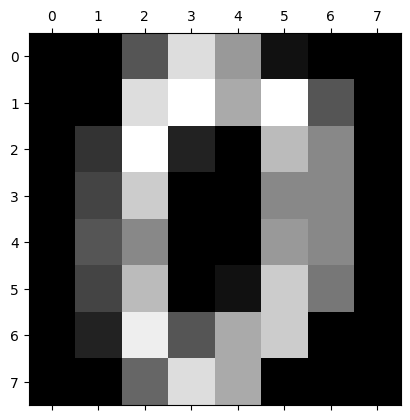

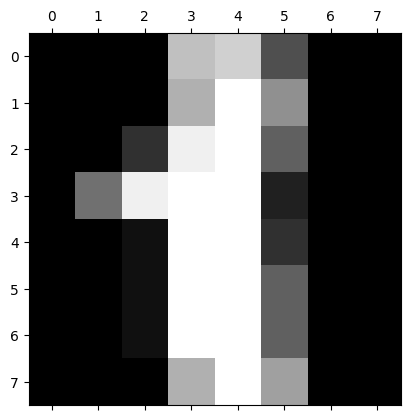

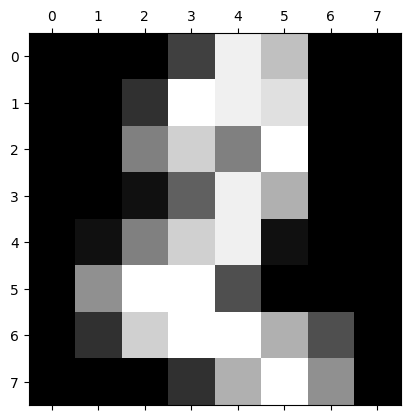

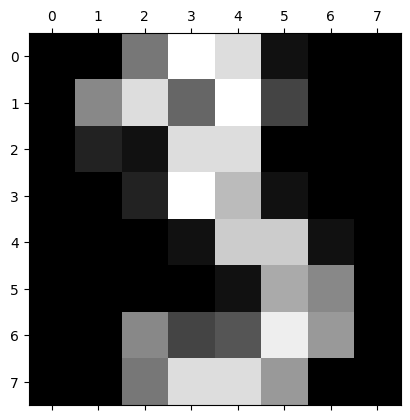

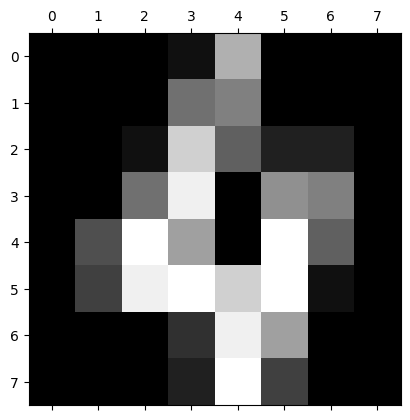

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [5]:
df=pd.DataFrame(digits.data)
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(['target'],axis='columns'),df.target,test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9833333333333333

In [14]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
ypredicted=model.predict(xtest)

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypredicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 47,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 32]])

Text(50.722222222222214, 0.5, 'Truth')

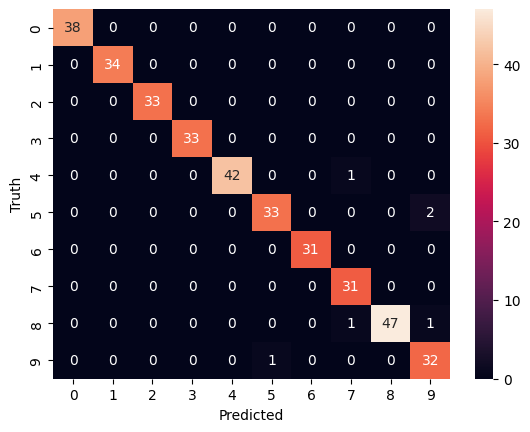

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')